

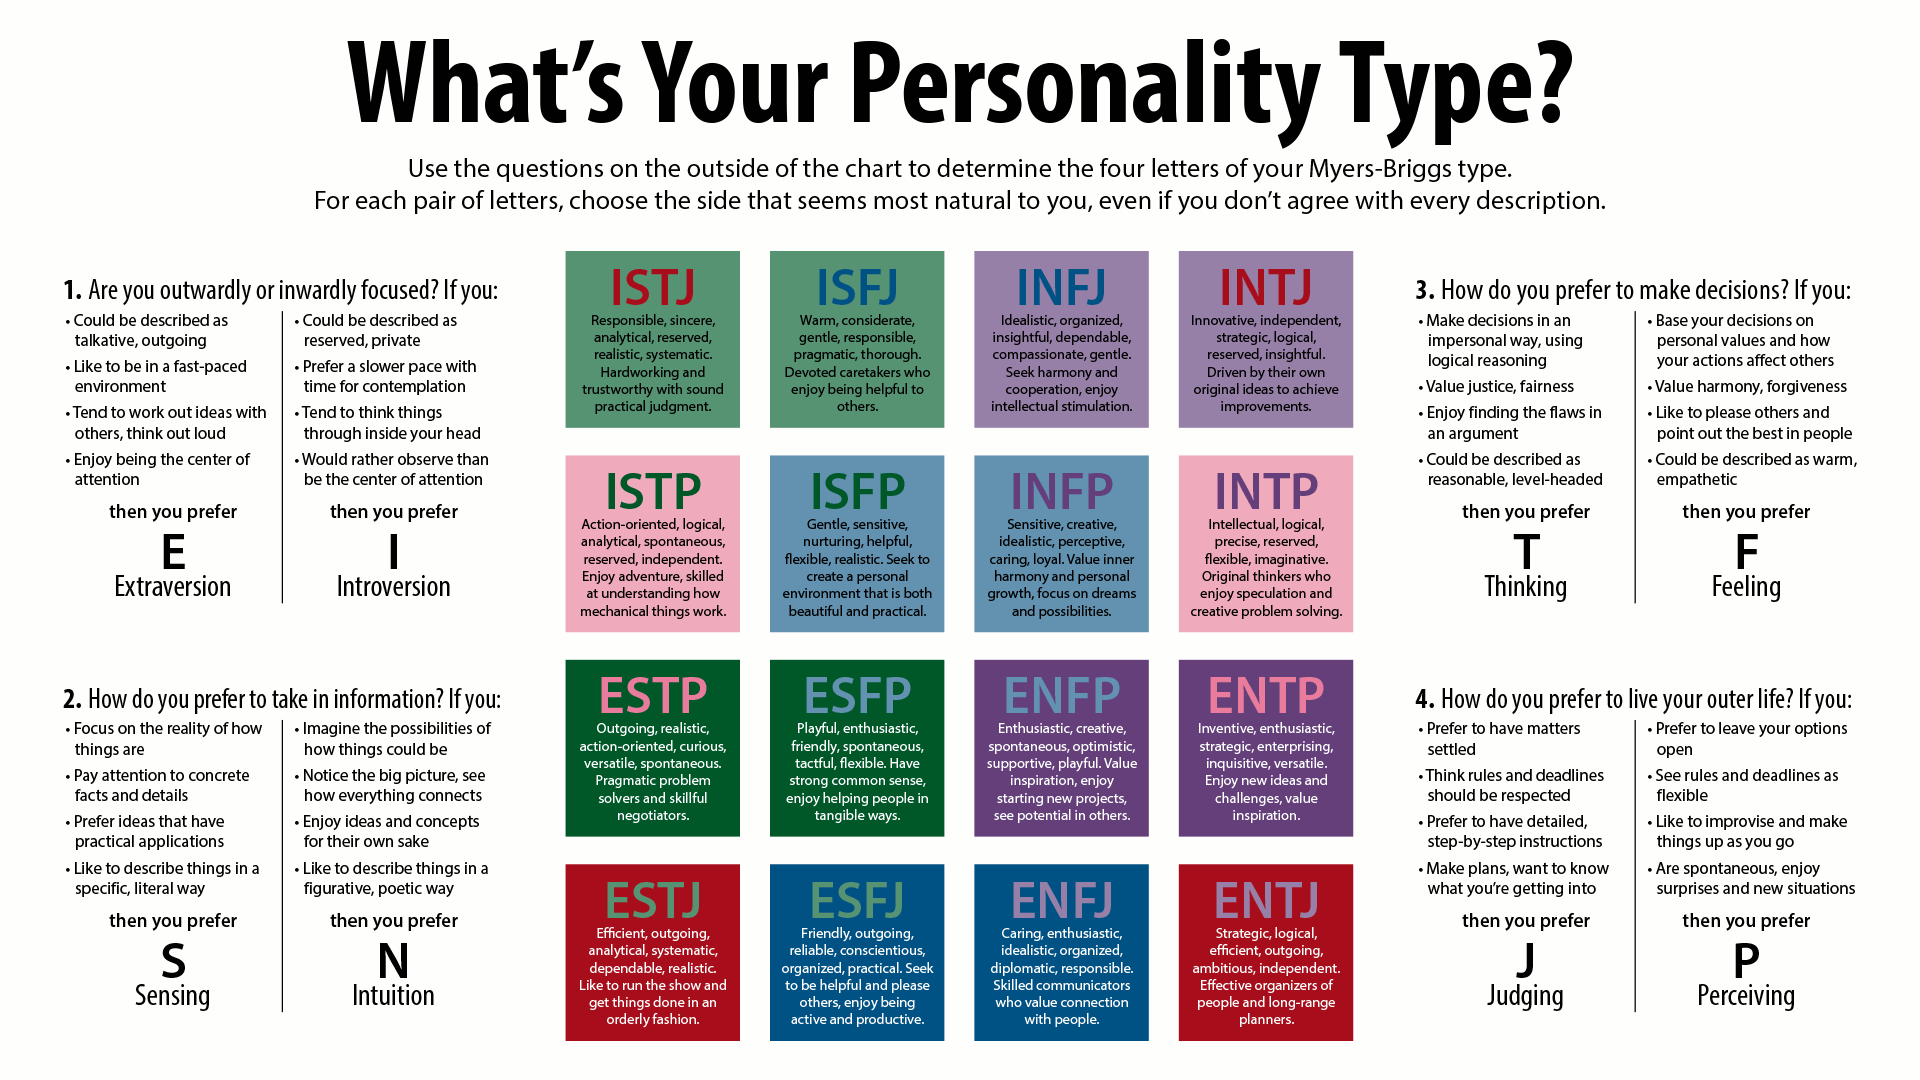


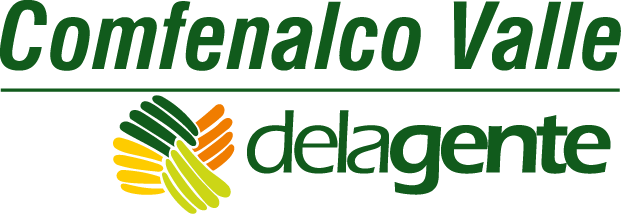

**Myers-Briggs Personality Type**

The purpose of this project is to help the human resources department of Comfenalco at the moment of the hiring process to predict what kind types of personalities on the Myers Briggs a person will present based on the social text posts and comments.

The data used to train the algorithm in english is from a public dataset that took twitter posts and comments and have those identified on one of the 16 types.

**Note: Due to the privacy terms established by the Comfenalco company, the Spanish version cannot be reviewed and the data obtained from the people involved with the company cannot be used.

The content in this file was verified by Andrea Guzman

In [1]:
import pandas as pd
import numpy as np
import re #Regular expression eng version
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read data
data = pd.read_csv('/content/drive/My Drive/mbti_1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [4]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


List of posts

In [5]:
[p.split('|||') for p in data.head(2).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

**Data exploration**

---

Distribution of the MB personality types

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


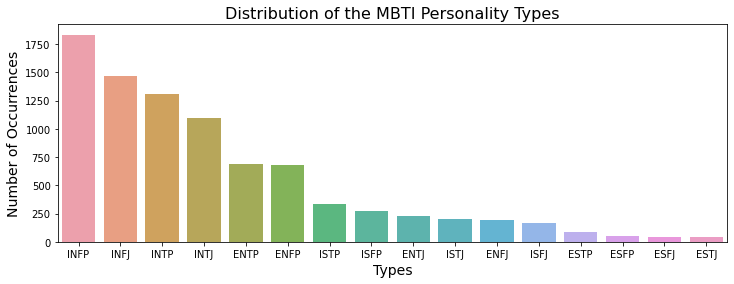

In [6]:
cnt_types = data['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_types.index, cnt_types.values, alpha=0.9)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Types', fontsize=14)
plt.title('Distribution of the MBTI Personality Types', size=16)
plt.show()

In [7]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

In [8]:
data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) – Sensing (S):		 1197  /  7478
Thinking (T) – Feeling (F):		 4694  /  3981
Judging (J) – Perceiving (P):		 5241  /  3434


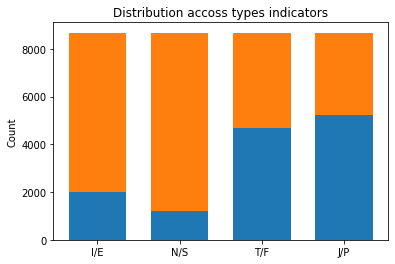

In [9]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

n = 4
but = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

ind = np.arange(n)    
width = 0.7      

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

Pearson Correalation

In [10]:
data[['IE','NS','TF','JP']].corr()

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


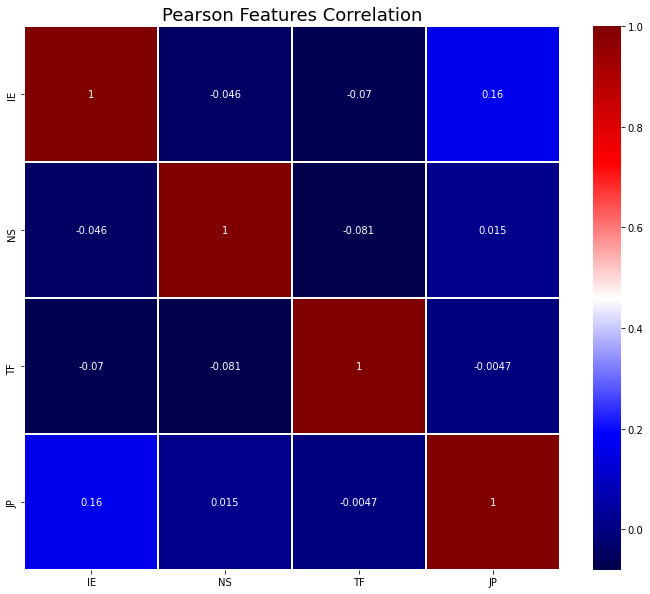

In [11]:
corr = data[['IE','NS','TF','JP']].corr()
cmap = plt.cm.seismic
plt.figure(figsize=(12, 10))
plt.title('Pearson Features Correlation', size=18)
sns.heatmap(corr, cmap=cmap, annot=True, linewidths=1)

**Preprocessing Data**

---



In [12]:
#Binarization
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality   
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s


In [13]:
#Natural Langage english toolkit
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [14]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize

Lemmatize

In [16]:
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

unique_type_list = [x.lower() for x in unique_type_list]

stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

cacheStopWords = stopwords.words("english")

def preProcessData(data, remove_stop_words=True, remove_mb_profiles=True):

  listPersonality = []
  listPosts = []
  len_data = len(data)
  i=0

  for row in data.iterrows():
    i+=1
    if (i % 500 == 0 or i == 1 or i == len_data):
      print("%s of %s rows" % (i, len_data))

    posts = row[1].posts

    temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
    temp = re.sub("[^a-zA-Z]", " ", temp)
    temp = re.sub(' +', ' ', temp).lower()

    if remove_stop_words:
      temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cacheStopWords])
    else:
      temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

    if remove_mb_profiles:
      for t in unique_type_list:
        temp = temp.replace(t, "")

    type_labelized = translate_personality(row[1].type)
    listPersonality.append(type_labelized)
    listPosts.append(temp)

  listPosts = np.array(listPosts)
  listPersonality = np.array(listPersonality)
  return listPosts, listPersonality


In [17]:
list_posts, list_personality =  preProcessData(data, remove_stop_words=True)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


In [18]:
print("Number of posts and personalities: ")
print(list_posts.shape, list_personality.shape)

Number of posts and personalities: 
(8675,) (8675, 4)


Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

In [20]:
countVect = CountVectorizer(analyzer='word',
                        max_features=1500, 
                        tokenizer=None, 
                        preprocessor=None, 
                        stop_words=None, 
                        max_df=0.7, 
                        min_df=0.1) #Keep only words appearing in 10% to 70%

X_cnt = countVect.fit_transform(list_posts)
tfizer = TfidfTransformer()
X_tfidf = tfizer.fit_transform(X_cnt).toarray()

In [21]:
feature_names = list(enumerate(countVect.get_feature_names()))

In [22]:
X_tfidf.shape

(8675, 791)

*What the machine sees at this point?*

In [23]:
list_posts[0]

'   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality well h

In [24]:
print("X: tf-idf representation \n* 1st row:\n%s" % X_tfidf[0])

X: tf-idf representation 
* 1st row:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08042209 0.06830218 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10331537 0.         0.04973404 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10984584 0.         0.         0.         0.08642509
 0.         0.         0.10488948 0.         0.         0.
 0.         0.         0.05188886 0.06824736 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        

In [25]:
type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]

for l in range(len(type_indicators)):
    print(type_indicators[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) – Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) – Perceiving (P)


In [26]:
print("MBTI 1st row: %s" % translate_back(list_personality[0,:]))
print("Y: Binarized MBTI 1st row: %s" % list_personality[0,:])

MBTI 1st row: INFJ
Y: Binarized MBTI 1st row: [0 0 0 0]


XGBoost model

In [27]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
X = X_tfidf

for l in range(len(type_indicators)):
  print("%s ..." % (type_indicators[l]))

  Y = list_personality[:, l]

  test_size = 0.33
  X_train, X_test, y_train, y_test = train_test_split(X, 
                                                      Y, 
                                                      test_size=test_size, 
                                                      random_state=42)
  model = XGBClassifier()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy*100.00))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 78.34%
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 85.61%
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 72.79%
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 66.22%


Feature Relevance

In [30]:
from xgboost import plot_importance

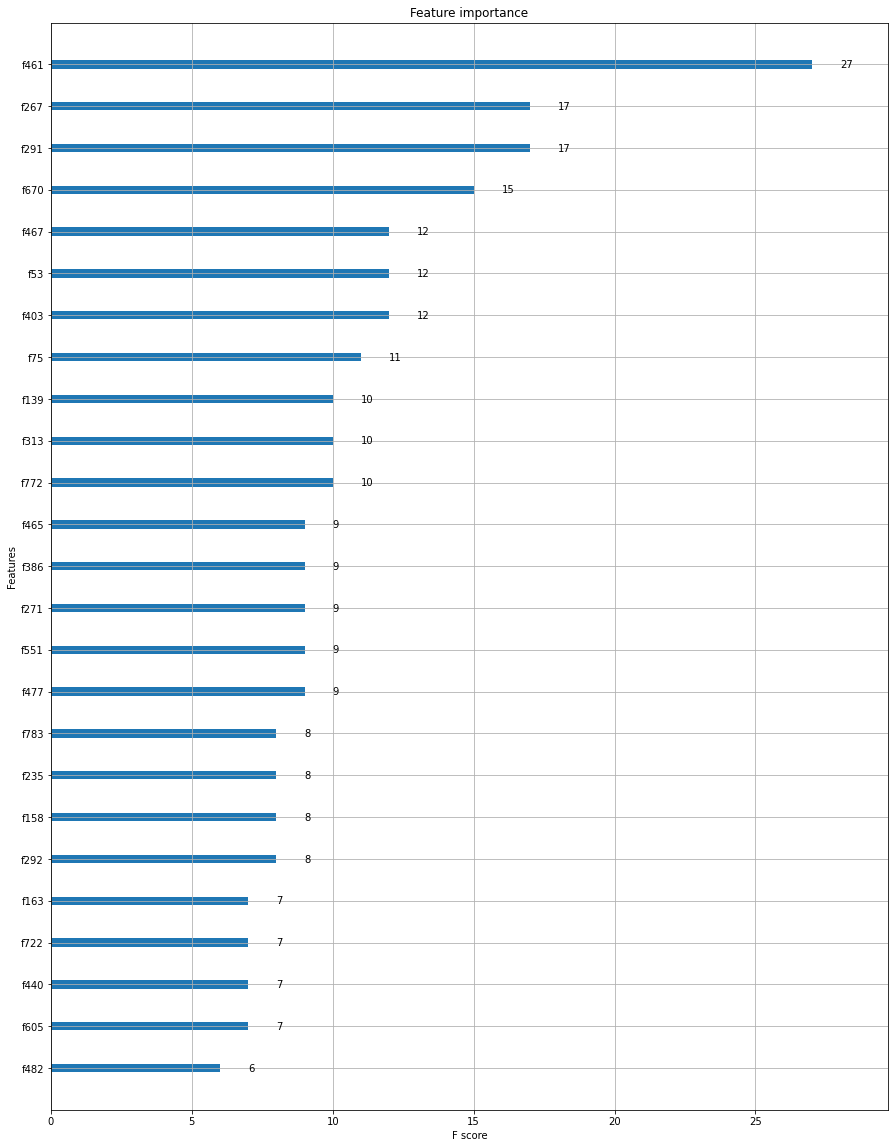

In [31]:
y = list_personality[:, 0]
model = XGBClassifier()
model.fit(X, y)

#Plot relevance
ax = plot_importance(model, max_num_features=25)

fig = ax.figure
fig.set_size_inches(15,20)
plt.show()

In [32]:
features = sorted(list(enumerate(model.feature_importances_)), key=lambda x: x[1], reverse=True)
for f in features[0:25]:
    print("%d\t%f\t%s" % (f[0],f[1],countVect.get_feature_names()[f[0]]))
    
#saving XGBoost Model
default_get_xgb_params = model.get_xgb_params()

461	0.009033	ne
291	0.008526	guy
403	0.007722	lol
267	0.007063	fun
292	0.006774	haha
396	0.006556	listening
685	0.006194	tell
761	0.006189	wink
53	0.006170	awesome
183	0.006107	dream
772	0.005912	world
313	0.005892	hey
477	0.005847	nt
569	0.005841	relationship
551	0.005829	quiet
455	0.005762	music
467	0.005734	ni
139	0.005721	crazy
265	0.005697	fuck
271	0.005654	game
75	0.005644	bored
213	0.005609	everyone
629	0.005543	sometimes
26	0.005496	animal
608	0.005425	shy


In [33]:
default_get_xgb_params = model.get_xgb_params()
default_get_xgb_params

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 1,
 'verbosity': 1}

XGBoost Hyperparameter Tuning

In [34]:
param = {}

param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        Y, 
                                                        test_size=test_size, 
                                                        random_state=42)

    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 78.10%
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 85.75%
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 73.28%
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 65.11%


To find the best way to boost the params we use GridSearchCV.

The parameters to consider tuning are:

*   The number and size of trees
*   The learning rate and number of trees
*   The row and column subsampling rates



In [35]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [36]:
X = X_tfidf

param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]
    model = XGBClassifier(**param)
    learning_rate = [0.1, 0.2, 0.3]
      
    param_grid = {
        'n_estimators' : [ 200, 300],
        'learning_rate': learning_rate,
        'max_depth': [2,3,4]
    }

    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
    grid_result = grid_search.fit(X, Y)

    #Results monitoring
    print("* Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("* %f (%f) with: %r" % (mean, stdev, param))

IE: Introversion (I) / Extroversion (E) ...


KeyboardInterrupt: ignored

**Find your own Myers-Brigs Personality Type**
---


---

1. Prep your data:
  *Copy and paste some posts or cooments you have made in english separete them by an enter*

2. Let the code do the rest
3. See the result


In [39]:
my_posts  = """Getting started with data science and applying machine learning has never been as simple as it is now. There are many free and paid online tutorials and courses out there to help you to get started. I’ve recently started to learn, play, and work on Data Science & Machine Learning on Kaggle.com. In this brief post, I’d like to share my experience with the Kaggle Python Docker image, which simplifies the Data Scientist’s life.
Awesome #AWS monitoring introduction.
HPE Software (now @MicroFocusSW) won the platinum reader's choice #ITAWARDS 2017 in the new category #CloudMonitoring
Certified as AWS Certified Solutions Architect 
Hi, please have a look at my Udacity interview about online learning and machine learning,
Very interesting to see the  lessons learnt during the HP Operations Orchestration to CloudSlang journey. http://bit.ly/1Xo41ci 
I came across a post on devopsdigest.com and need your input: “70% DevOps organizations Unhappy with DevOps Monitoring Tools”
In a similar investigation I found out that many DevOps organizations use several monitoring tools in parallel. Senu, Nagios, LogStach and SaaS offerings such as DataDog or SignalFX to name a few. However, one element is missing: Consolidation of alerts and status in a single pane of glass, which enables fast remediation of application and infrastructure uptime and performance issues.
Sure, there are commercial tools on the market for exactly this use case but these tools are not necessarily optimized for DevOps.
So, here my question to you: In your DevOps project, have you encountered that the lack of consolidation of alerts and status is a real issue? If yes, how did you approach the problem? Or is an ChatOps approach just right?
You will probably hear more and more about ChatOps - at conferences, DevOps meet-ups or simply from your co-worker at the coffee station. ChatOps is a term and concept coined by GitHub. It's about the conversation-driven development, automation, and operations.
Now the question is: why and how would I, as an ops-focused engineer, implement and use ChatOps in my organization? The next question then is: How to include my tools into the chat conversation?
Let’s begin by having a look at a use case. The Closed Looped Incidents Process (CLIP) can be rejuvenated with ChatOps. The work from the incident detection runs through monitoring until the resolution of issues in your application or infrastructure can be accelerated with improved, cross-team communication and collaboration.
In this blog post, I am going to describe and share my experience with deploying HP Operations Manager i 10.0 (OMi) on HP Helion Public Cloud. An Infrastructure as a Service platform such as HP Helion Public Cloud Compute is a great place to quickly spin-up a Linux server and install HP Operations Manager i for various use scenarios. An example of a good use case is monitoring workloads across public clouds such as AWS and Azure.
"""

# The type is just a dummy so that the data prep fucntion can be reused
personData = pd.DataFrame(data={'type': ['INFJ'], 'posts': [my_posts]})

personPosts, dummy  = preProcessData(personData, remove_stop_words=True)

my_X_cnt = countVect.transform(personPosts)
my_X_tfidf = tfizer.transform(my_X_cnt).toarray()

1 of 1 rows


In [40]:
param = {}
param['n_estimators'] = 300
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.1

result = []

for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    seed = 42
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    #Predict for person data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])
    print("* %s prediction: %s" % (type_indicators[l], y_pred))

print("Ther person is: ", translate_back(result))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) prediction: [0]
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) prediction: [0]
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) prediction: [1]
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) prediction: [0]
Ther person is:  INTJ
